#ResearchPubAI LangGraph
**Training presentation and paper analyser**
1. Analyse the training paper

**Planner**
2. Learn how the paper was planned step by step from the rough work, Plan the papaer step wise --Create steps to execute

For each step

3. Learn How the training modules(terminology and template) can be used according to the plan

**Test Data**

4. Gather the information from test data & input parameters (important to keep both text and images) Lchain +test

    a. Integrate web search to search for images in google.
  
    b. Read other papers and get the content related to those webpages
    
    c. Make sure the test data does not find the exact paper. So papers published before certain time should be a criteria

**Action**
5. Act based on the plan per step based on the learning and how it can be applied. +test     

** Evaluate answers Modules**
7. Evaluate using  is answering the questsion ?
    a. if Yes- End
    b. If No - Rewrite the question and loop again

    a. Sentiment analyzer- check sentiment that aligns with the answer? if not change the sentiment parameters in prompt and repeat step 5  
      i. if yes - useful- gather final answer and  go to the next step in the plan.

      ii. if no - Indicate to the user  
    not useful- Re-write or transform the prompt & Replan- change prompt and repeat from step 5
    useful- gather final answer and  go to the next step in the plan.

9. Create a response for the prompt with respect to the paper

**Submission documents**
12. Pitch video
13. flow diagrams, clean code, elegance, tutorial Documentation & References




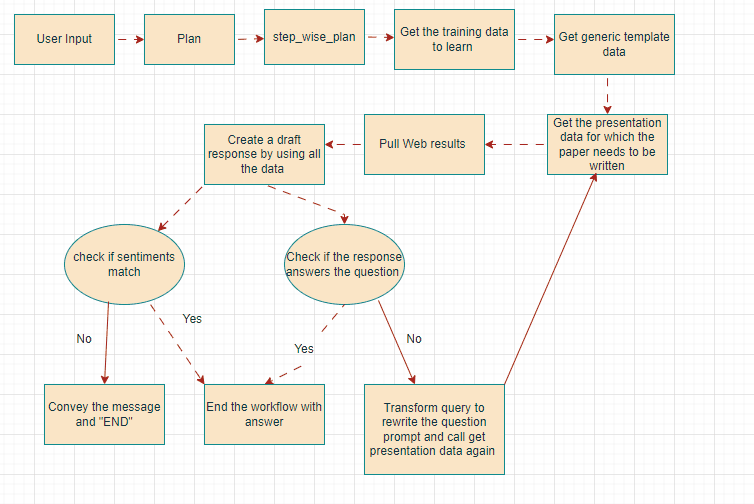

In [419]:
!python --version
!sudo update-alternatives --config python3
!sudo apt-get update -y
!sudo apt-get install python3.11 python3.11-dev python3.11-distutils libpython3.11-dev
!python3 --version

Python 3.11.10
There are 2 choices for the alternative python3 (providing /usr/bin/python3).

  Selection    Path                 Priority   Status
------------------------------------------------------------
* 0            /usr/bin/python3.11   2         auto mode
  1            /usr/bin/python3.10   1         manual mode
  2            /usr/bin/python3.11   2         manual mode

Press <enter> to keep the current choice[*], or type selection number: 
Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
0% [Waiting for headers]
Hit:8 https://ppa

In [433]:
%%capture --no-stderr
%pip install -U langchain langchain_openai langsmith pandas langchain_experimental matplotlib langgraph langchain_core  faiss-cpu  pypdf langchain_community mdutils datasets langchain_huggingface xmltodict sentence-transformers langchain_groq langchain_ollama langchain_mistralai fitz jq langchain_cohere frontend
%pip install -U PyMuPDF openai


In [434]:
!python --version

Python 3.11.10


###Common imports


In [435]:
from PIL import Image
import io
import os
from dotenv import load_dotenv

import google.generativeai as genai
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.documents import Document
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import Chroma
#from langchain_cohere import ChatCohere, CohereEmbeddings
# Load environment variables from a .env file
from google.colab import userdata
from langchain_openai import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain.schema.output_parser import StrOutputParser
os.environ["OPENAI_API_KEY"]=userdata.get('OPENAI_API_KEY')

## Langsmith tracking
os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_API_KEY"]=userdata.get('LANGCHAIN_API_KEY')
os.environ["TAVILY_API_KEY"]=userdata.get('TAVILY_API_KEY')
os.environ["COHERE_API_KEY"]=userdata.get('COHERE_API_KEY')
import nest_asyncio
from typing import List, TypedDict, Any, Tuple
from pydantic import BaseModel, Field
from langgraph.graph import StateGraph, END, START
from datetime import date, datetime
from langgraph.checkpoint.memory import MemorySaver
import getpass
from langchain_community.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import FAISS
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.tools.retriever import create_retriever_tool
from langgraph.prebuilt import create_react_agent
from langchain.prompts import PromptTemplate
from langchain.tools.retriever import create_retriever_tool
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_cohere import ChatCohere, CohereEmbeddings
import fitz  # PyMuPDF
from PIL import Image
import io
import os
import base64
import httpx
from langchain_core.messages import HumanMessage
import google.generativeai as genai
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.documents import Document
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import Chroma
from langchain_cohere import ChatCohere, CohereEmbeddings
nest_asyncio.apply()
from google.colab import drive
from langchain_core.pydantic_v1 import BaseModel, Field
from pprint import pprint
import functools
import operator
from typing import Sequence
from typing_extensions import TypedDict
import operator
from typing import Annotated, List, Tuple
from typing_extensions import TypedDict
from pydantic import BaseModel, Field
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.messages import BaseMessage
from langgraph.graph import END, StateGraph, START
from langgraph.prebuilt import create_react_agent
from langchain_core.prompts import PromptTemplate
from typing import List
from pydantic import BaseModel, Field
from langchain_core.prompts import PromptTemplate
from langchain.output_parsers import PydanticOutputParser
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_openai import ChatOpenAI
from pydantic import BaseModel
from typing import Literal
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Constants used in this notebook along with data folder paths

In [436]:
#Constants
foldersjson={
    "terminologyDataset":"/content/drive/MyDrive/Colab Notebooks/colab_data/ResearchPubAI/terminologyDataset",
    "trainingData":"/content/drive/MyDrive/Colab Notebooks/colab_data/ResearchPubAI/trainingData",
    "testData":"/content/drive/MyDrive/Colab Notebooks/colab_data/ResearchPubAI/testData",
}
MODEL_NAME="gpt-3.5-turbo-0125"
DATABASE_PATH="/content/drive/MyDrive/Database"
# LLM with function call, can use ChatGRroq with llama3 or ChatOllama as well for open-source options
llm = ChatOpenAI(model="gpt-3.5-turbo-0125", temperature=0)
llmImage=ChatOpenAI(model="gpt-4o",temperature=0, max_tokens=2000)
TERMINOLOGY_INDEX_NAME="terminologiesKnowledgeBase"
TEMPLATE_KB_INDEX_NAME="templateKnowledgeBase"
TRAINING_DATA_INDEX_NAME="learnTrainingData"
ROUGH_WORK_INDEX_NAME="roughworktestdata"

###Common utility modules


In [484]:
def load_files(file_paths):
    documents = []
    for file in file_paths:
        extension = get_file_type(file)
        print("Extension", extension)
        if extension == '.txt':
            loader = TextLoader(file)
            l=loader.load()
        elif extension == '.csv':
            loader = CSVLoader(file)
            l=loader.load()
        elif extension == '.json':
            loader = JSONLoader(file, jq_schema=".",json_lines=True,text_content=False)
            l=loader.load()
        elif extension == '.pdf':
            #loader = PyPDFLoader(file, extract_images=True)
            loader = PyPDFLoader(file, extract_images=True)
            #l=loader.load_and_split()
            l=loader.load()
        else:
            continue
        documents.extend(l)
    return documents

def get_file_type(file_path):
    _, extension = os.path.splitext(file_path)
    return extension.lower()

def getFilePathList(folderPath):
  allFileswithPath=[]
  folders=folderPath
  for item in os.listdir(folders):
    filewithPath=folders+"/"+item
    print(filewithPath)
    allFileswithPath.append(filewithPath)
    return allFileswithPath

def saveTextDB(indexName,allFileswithPath):
  #NO NEED TO RUN THIS CODE WHEN THE DATABASE IS ALREADY CREATED
  documents=load_files(allFileswithPath)
  text_splitter=RecursiveCharacterTextSplitter(chunk_size=500,chunk_overlap=100)
  final_documents=text_splitter.split_documents(documents)
  embeddings=OpenAIEmbeddings()
  vecStore=FAISS.from_documents(final_documents,embeddings)
  # Save the vector DB to your local
  dbAllPapaers =vecStore.save_local(folder_path=DATABASE_PATH, index_name=indexName)

def saveTextImageVecDB(indexName,allFileswithPath,text_data,img_data):
  #NO NEED TO RUN THIS CODE WHEN THE DATABASE IS ALREADY CREATED

  # Load the document
  docs_list = [Document(page_content=text['response'], metadata={"name": text['name']}) for text in text_data]
  img_list = [Document(page_content=img['response'], metadata={"name": img['name']}) for img in img_data]
  # Split
  text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=400, chunk_overlap=50
  )

  doc_splits = text_splitter.split_documents(docs_list)
  img_splits = text_splitter.split_documents(img_list)
  #embeddings=OpenAIEmbeddings()
  embedding_model = CohereEmbeddings(model="embed-english-v3.0")

  vecStore=FAISS.from_documents(
      documents=doc_splits + img_splits, # adding the both text and image splits
    embedding=embedding_model,)
  # Save the vector DB to your local
  db =vecStore.save_local(folder_path=DATABASE_PATH, index_name=indexName)

def loadDBRetreiever(indexName):
  db=FAISS.load_local(folder_path=DATABASE_PATH, index_name=indexName, embeddings=OpenAIEmbeddings(),allow_dangerous_deserialization=True)
  paperRetreiever=db.as_retriever()
  return paperRetreiever

def loadDBRetreieverWithImages(indexName):
  db=FAISS.load_local(folder_path=DATABASE_PATH, index_name=indexName, embeddings=CohereEmbeddings(model="embed-english-v3.0"),allow_dangerous_deserialization=True)
  paperRetreiever=db.as_retriever()
  return paperRetreiever


def createRetTool(retreiever, toolname, tooldesc):
    retrieverList=[]
    retriever_tool=create_retriever_tool(retreiever,toolname, tooldesc)
    retrieverList.append(retriever_tool)
    return retrieverList

def save_images(filePath):
  text_data = []
  img_data = []
  with fitz.open(filePath) as pdf_file:
    # Create a directory to store the images
    if not os.path.exists("extracted_images"):
        os.makedirs("extracted_images")

    # Loop through every page in the PDF
    for page_number in range(len(pdf_file)):
        page = pdf_file[page_number]

        # Get the text on page
        text = page.get_text().strip()
        text_data.append({"response": text, "name": page_number+1})
        # Get the list of images on the page
        images = page.get_images(full=True)

        # Loop through all images found on the page
        for image_index, img in enumerate(images, start=0):
            xref = img[0]  # Get the XREF of the image
            base_image = pdf_file.extract_image(xref)  # Extract the image
            image_bytes = base_image["image"]  # Get the image bytes
            image_ext = base_image["ext"]  # Get the image extension

            # Load the image using PIL and save it
            image = Image.open(io.BytesIO(image_bytes))
            image.save(f"extracted_images/image_{page_number+1}_{image_index+1}.{image_ext}")
  return text_data, img_data

#Can use gemini instead as an open source
'''genai.configure(api_key=os.getenv('GOOGLE_API_KEY'))
model = genai.GenerativeModel(model_name="gemini-1.5-flash")'''

def generate_image_captioning(img_data):
  for img in os.listdir("extracted_images"):
    print(img)
    im = "extracted_images/{img}"
    with open(os.path.join("extracted_images", img), "rb") as image_file:
      image_bytes = image_file.read()

    image_data = base64.b64encode(image_bytes).decode("utf-8") # encoding image bytes to base64
    prompt="You are an assistant tasked with summarizing tables, images and text for retrieval. \
    These summaries will be embedded and used to retrieve the raw text or table elements \
    Give a concise summary of the table or text that is well optimized for retrieval. Table or text or image."
    message = HumanMessage(
    content=[
        {"type": "text", "text": prompt},
        {
            "type": "image_url",
            "image_url": {"url": f"data:image/jpeg;base64,{image_data}"},
        },
      ]
    )
    llm = ChatOpenAI(model="gpt-4o")
    ai_msg = llm.invoke([message])
    print(ai_msg.content)
    img_data.append({"response":ai_msg.content, "name": img})
  return img_data




#Create terminology and Learner Knowledge Base

***Terminology and Template Knowledge base LangGraph***
###Step 1:
Gathered around 5 PDF's nature communication, Science magazine pdf and nano letters
###Step 2:
Coverted them into embeddings and stored in vector database
###Step 3: Terminology KB
a. For terminology knowledge base, Gathered all the terminology list, created a prompt to ask question about what is each of them and stored the answers in a json.

b. Use websearch when unable to find the meaning of a terminology in that list

c. Used Step 2 to store the terminology knowlegde base into vector Database

d. Achieved a,b,c via LangGraph. Refer to terminologyKB.ipynb for more details.

###Step 3: Template KB
a. For template knowledge base, Created prompts to understand various templates and how the papers are structured

b. Use websearch if the answer given by the LLM is not satisfactory. Understand how the templates are in general web results.

c. Used Step 2 to store the terminology knowlegde base into vector Database

d. Achieved a,b,c via LangGraph. Refer to templateLearnerLangGraph.ipynb for more details.

From here on, terms Terminology Knowledge base and Template Knowledge base and this is what it means!




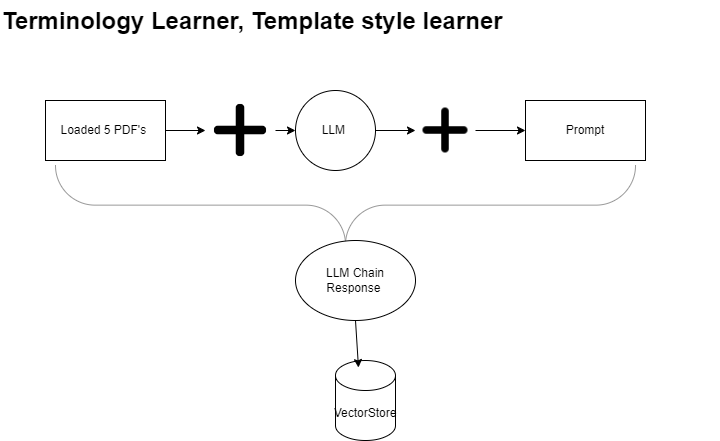




###TrainingDataAnalyser Agent Node
Training Data includes one presentation and the related paper.
1 PPT slides + 1 Paper


##ReACT prompting technique

In [438]:
trainingDataAnalyserPrompt='''Answer the following questions as best you can. You have access to the following context:

{documents}

Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action:
"This agent uses the tool trainingDataRAG."
"The context consists of 2 PDF files."
"One PDF consists of presentation slides which contains all the data that needs to be on the paper."
"Another PDF is the actual paper created out of all the information present in the slides."
"Learn how the slides are converted into the paper. Train yourself to create similar thing on the test data."
"Give precise answers and do not add any explanatory or introductory statements in the responses"
the action to take, should be one of {documents}
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question

Begin!

Question: {input}
Thought:'''

##Training Data Retreiever

The vector database already contains 2 PDF files ( 1 PPT + 1Paper)
Creating a retreiever for this training data

In [487]:
retreiverTrainDataLearning=loadDBRetreieverWithImages(TRAINING_DATA_INDEX_NAME)
trainingDataRettoolList=createRetTool(retreiverTrainDataLearning,"trainingDataRAG","This tool contains presentation slides and paper that can be used as an example to learn")
print(retreiverTrainDataLearning)


tags=['FAISS', 'CohereEmbeddings'] vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x784ec40325f0> search_kwargs={}


## Test Data Retriever

This data contains One presentation for which this application should create a paper.
The test data is also used alternatively as presentation data


In [475]:
retrieverTestData=loadDBRetreieverWithImages(ROUGH_WORK_INDEX_NAME)
retreiverTesttoolList=createRetTool(retrieverTestData,"testDataRAG","This tool contains presentation slides of an author. Use the information to answer the question")

In [488]:
retreiverTerminologies=loadDBRetreiever(TERMINOLOGY_INDEX_NAME)
terminologyRettoolList=createRetTool(retreiverTerminologies,"terminologyRAG","This tool contains terminologies that are used in similar papers. Refer this for any query related to this")
print(retreiverTerminologies)
result = retreiverTerminologies.invoke("what is terrahertz?")

tags=['FAISS', 'OpenAIEmbeddings'] vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x784ec55573d0> search_kwargs={}


## Retrieve documents from the vector store for a particular question

In [489]:
def retrieve(retreiver,question):
    """
    Retrieve documents

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): New key added to state, documents, that contains retrieved documents
    """
    print("---RETRIEVE---")
    print("START")
    print(question)


    # Retrieval
    documents = retreiver.invoke(question)
    print("documents")
    print(documents)

    return {"documents": documents, "question": question}
result = retreiverTerminologies.invoke("what is terrahertz?")
#result = retrieve(retreiverTerminologies,"Give me title of the paper stated in the presentation slides")

## Data model to have structured responses for the respective chains

In [491]:
class TrainingData(BaseModel):
    """Learn the training data"""
    content: str = Field(
        description="the content that is learned from the training data"
    )

class PresentationTestData(BaseModel):
  """The data in the presentation"""
  content: str = Field(
      description="the content that is in the presentation slides for which the questions are being answered"
  )

class TemplateData(BaseModel):
  """The data in the template details"""
  content: str = Field(
      description="The data in the template details"
  )

class TerminologyData(BaseModel):
  """The data in the terminologies knowledge base"""
  content: str = Field(
      description="The data in the terminologies knowledge base"
  )

class CheckSentiment(BaseModel):
    """Binary score for checking whether the response indicates the correct sentiments."""

    binary_score: str = Field(
        description="Binary score for checking whether the response indicates the correct sentiments. 'yes' or 'no'"
    )

class AnswersQuestion(BaseModel):
    """Binary score to check if the response answers the question."""

    binary_score: str = Field(
        description="Binary score for checking whether the response answers the question. 'yes' or 'no'"
    )

## Training data chain

In [492]:
#training data chain
def getTrainingDataChain(state):
  tool_names=", ".join([tool.name for tool in trainingDataRettoolList])
  trainingDataAnalyserSysPrompt = PromptTemplate(
      template=trainingDataAnalyserPrompt,
      input_variables=["input","documents"])
  print(trainingDataAnalyserPrompt)

  trainingDataLearning_chain=trainingDataAnalyserSysPrompt | llm.with_structured_output(TrainingData)
  return trainingDataLearning_chain

## Test data/ Presentation Data Prompt and chain

In [500]:
def testDataChain():
  """
  Retrieve documents
  Args:
      state (dict): The current graph state
  Returns:
      state (dict): New key added to state, documents, that contains retrieved documents
  """
  testDataPrompt=""" For the given query {input}, use the {documents} as context and get me the answer"""
  testdatasysPrompt=PromptTemplate(
      template=testDataPrompt,
      input_variables=["input","documents"])

  testDataChain=testdatasysPrompt |  llm.with_structured_output(PresentationTestData)
  return testDataChain

##Terminology prompt and chain


In [497]:
terminologiesPrompt=''''"This agent uses the tool terminologyRAG."
"The tool contains terminologies knowledge base in similar papers.Use the terminology knowledge base when required."
"Give precise answers and do not add any explanatory or introductory statements in the responses"
the action to take, should be one of [{documents}]
Keeping the above notes in thoughts,
Answer the following question: Get all the terminologies present in the vector store'''

def getTerminologyChain(state):
  """
  Retrieve documents
  Args:
      state (dict): The current graph state
  Returns:
      state (dict): New key added to state, documents, that contains retrieved documents
  """
  terminologySysPrompt = PromptTemplate(
      template=terminologiesPrompt,
      input_variables=["document"])

  terminologyChain=terminologySysPrompt | llm.with_structured_output(TerminologyData)
  return terminologyChain

##Template Prompt and chain


In [498]:
retreiverTemplates=loadDBRetreiever(TEMPLATE_KB_INDEX_NAME)
retreiverTemplatestoolList=createRetTool(retreiverTemplates,"templatesRAG","This tool contains templates of various papers. Refer this for any query related to this")
print(retreiverTemplatestoolList)
templatePrompt=''''"This agent uses the tool templatesRAG vector store."
"The tool contains template information needed to write a paper. It contains information about Science Magazine report, Nature Communications and Nano letter templates"
"Give precise answers and do not add any explanatory or introductory statements in the responses"
the action to take, should be one of {documents}
Keeping the above notes in thoughts,
Answer the following question: What is the generic template guidelines to create a Nature communications article??'''

def getTemplateChain(state):
  """
  Retrieve documents
  Args:
      state (dict): The current graph state
  Returns:
      state (dict): New key added to state, documents, that contains retrieved documents
  """
  templateSysPrompt = PromptTemplate(
      template=templatePrompt,
        input_variables=["documents"])
  print("Template Prompt")
  print(templateSysPrompt)
  templateChain=templateSysPrompt | llm.with_structured_output(TemplateData)
  return templateChain

[Tool(name='templatesRAG', description='This tool contains templates of various papers. Refer this for any query related to this', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x784eea621c60>, retriever=VectorStoreRetriever(tags=['FAISS', 'OpenAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x784ec55e1c90>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n'), coroutine=functools.partial(<function _aget_relevant_documents at 0x784eea622170>, retriever=VectorStoreRetriever(tags=['FAISS', 'OpenAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x784ec55e1c90>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document

##Create a draft answer prompt and chain




In [499]:
createDraftPrompt=''''"You are an expert in Writing Research articles."
You have access to these documents: {documents}

Use the following format:

Question: the input question you must answer
Thought:
you should always think about what to do.
You have all the data at this stage to create an answer to the question.
Use the training data:{trainData} as an example of how the paper is created using the presentation slides
Use the terminologiesKB:{termKB} and Think about the terminologies used in the rough data :{presentationData}
Using the templates knowledge base : {templateKB} to write in a similar style
Use the sentiments like {SentimentList} to create a draft answer with those sentiments inculcated.
Action:
"This agent uses the tool testDataRAG."
"The tool consists of the presentation slides of a paper that will be submitted for publishing in the future."
"The PDF consists of presentation slides which contains all the data that needs to be on the paper."
"Draft the responses based on the following sentiments [{SentimentList}]"
"Use the web search results here: {webSearch} to write the draft based on the context of the question {input}"
"Include relevant images and text in the presentation slides which is in vector store testDataRAG into the draft based on the context of the question {input}"
"Give precise answers and do not add any explanatory or introductory statements in the responses"
the action to take, should be one of {documents}
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question

Begin!

Question: {input}
Thought:'''


In [501]:
def getCreateDraftChain(state):
  """
  Retrieve documents
  Args:
      state (dict): The current graph state
  Returns:
      state (dict): New key added to state, documents, that contains retrieved documents
  """
  createDraftSysPrompt = PromptTemplate(
        template=createDraftPrompt,
        input_variables=["input","documents","SentimentList","trainData","templateKB","webSearch","presentationData"])
  draftWriterChain=createDraftSysPrompt | llm.with_structured_output(PresentationTestData)
  return draftWriterChain

## Planner LangGraph Node

Ref: Taken from LangChain Examples  

In [503]:
class PlanTrainPullExecute(TypedDict):
    curr_state: str
    question: str
    query_to_retrieve_or_answer: str
    plan: List[str]
    curr_context: str
    agent: str
    response: str
    curr_step: str
    terminologies: str
    templates: str
    train_data: str
    test_data: str
    paper_draft: str
    sentimentList : List[str]
    curr_agent: str
    datasource: str
    curr_tool: str
    websearchDocs: Document
    past_steps: List[str]
    rewrittenQuestion: str
    messages: Annotated[Sequence[BaseMessage], operator.add]
    context_documents: List[Document]


## Planner Data model, prompt and chain

In [504]:
class Plan(BaseModel):
    """Plan to follow in future"""
    steps: List[str] = Field(
        description="different steps to follow, should be in sorted order"
    )

In [505]:
planner_prompt =""" For the given query {question}, come up with a simple step by step plan of how to figure out the answer.

This plan should involve individual tasks, that if executed correctly will yield the correct answer. Do not add any superfluous steps.
The result of the final step should be the final answer. Make sure that each step has all the information needed - do not skip steps.

"""

planner_prompt = PromptTemplate(
    template=planner_prompt,
      input_variables=["question"], )
planner = planner_prompt |llmImage.with_structured_output(Plan)


## Stepwise data model, prompt, and chain

In [463]:
stepwise_plan_prompt_template = """You receive a plan {plan} which contains a series of steps to follow in order to answer a query.
you need to go through the plan refine it according to this:
1. every step has to be able to be executed by either:
    i. retrieving relevant information from a vector store of training data
    ii. retrieving relevant information from a vector store of terminologies
    iii. retrieving relevant information from a vector store of template Learner
    iv. retrieving relevant information from a vector store of test data and answering a question from a given context.
2. every step should contain all the information needed to execute it.

output the refined plan
"""

stepwise_plan_prompt = PromptTemplate(
    template=stepwise_plan_prompt_template,
    input_variables=["plan"],
)

stepwise_chain = stepwise_plan_prompt | llmImage.with_structured_output(Plan)


## Transform Query:  Question Rewriter Prompt and  Chain

In [506]:
### Question Re-writer
# Prompt
system = """You a question re-writer that converts an input question to a better version that is optimized \n
     for vectorstore retrieval. Look at the input and try to reason about the underlying semantic intent / meaning."""
re_write_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        (
            "human",
            "Here is the initial question by the user: \n\n {question} \n Formulate an improved question.",
        ),
    ]
)

question_rewriter = re_write_prompt | llm | StrOutputParser()
#question_rewriter.invoke({"question": question})

def transform_query(state):
    """
    Transform the query to produce a better question.

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): Updates question key with a re-phrased question
    """

    print("---TRANSFORM QUERY---")
    question = state["question"]

    # Re-write question
    better_question = question_rewriter.invoke({"question": question})
    state["rewrittenQuestion"]= better_question
    state["question"]= better_question
    return state


## Plan Steps
1. plan_step: Plan the task
2. step_wise_plan : Step-wise will create step wise workflow for writing the paper
3. trainingData: Training data, all the data that can be gather by training data will be stored in training_data
4. TerminologyKB: Stores the data with respect to terminologies
5. Templates: Stores the data with respect to templates
6. checkAnswerstheQuestionwithCorrectSentiment: Checks if the response answers the given question.

  *   If yes-check for sentiment match. end the workflow
  *   If no- rewrite the question to better answer the question

  Sentiment match:

  *   Yes- End without issue
  *   No- Report the problem and end the workflow





In [507]:

def plan_step(state: PlanTrainPullExecute):
    """
    Plans the next step.
    Args:
        state: The current state of the plan execution.
    Returns:
        The updated state with the plan.
    """
    #Initialize the state
    state["curr_agent"] = "planner"
    sentimentList=["Informative","Confident","informal"]
    state["curr_step"] = "plan"
    state["past_steps"]=[]
    state["sentimentList"]=sentimentList


    print("Planning step")
    pprint("--------------------")
    plan = planner.invoke({"question": state['question']})
    state["plan"] = plan.steps
    print(f'plan: {state["plan"]}')
    return state

def step_wise_plan(state: PlanTrainPullExecute):
    """
    Plans the next step.
    Args:
        state: The current state of the plan execution.
    Returns:
        The updated state with the plan.
    """
    state["curr_agent"] = "step_wise_plan"
    print("Breaking down plan steps into retrievable or answerable tasks")
    pprint("--------------------")
    refined_plan = stepwise_chain.invoke(state["plan"])
    state["plan"] = refined_plan.steps
    print(f'step wise plan: {state["plan"]}')
    return state

def trainingData(state: PlanTrainPullExecute):
    """
    Retrieve training data documents and call the agent to learn from it.
    Args:
        state (dict): The current graph state
    Returns:
        state (dict): New key added to state, documents, that contains retrieved documents
    """
    state["curr_agent"] = "trainingData"
    print("Retrieving training data")
    result = retrieve(retreiverTrainDataLearning,state["question"])
    state["context_documents"] = result["documents"]
    print(f'context_documents: {state["context_documents"]}')
    pprint("--------------------")
    input_data = {
    "input":state["question"],
    "documents":state["context_documents"],
  }
    trainingData = getTrainingDataChain(state).invoke(input_data)
    print(trainingData)
    state["train_data"] = trainingData.content
    print(f'training data: {state["train_data"]}')
    return state

def terminologyData(state: PlanTrainPullExecute):
    """
    Retrieve training data documents and call the agent to learn from it.
    Args:
        state (dict): The current graph state
    Returns:
        state (dict): New key added to state, documents, that contains retrieved documents
    """
    state["curr_agent"] = "terminologyData"
    print("Retrieving terminology data")

    result = retrieve(retreiverTerminologies,state["question"])
    state["context_documents"] = result["documents"]
    print(f'context_documents: {state["context_documents"]}')
    pprint("------RESULTS OUT--------------")
    input_data = {
    "documents":state["context_documents"],
  }
    termData = getTerminologyChain(state).invoke(input_data)
    state["terminologies"] = termData.content
    print(f'Terminology data: {state["terminologies"]}')
    return state

def templateData(state: PlanTrainPullExecute):
    """
    Retrieve template data with various different templates .
    Args:
        state (dict): The current graph state
    Returns:
        state (dict): New key added to state, documents, that contains retrieved documents
    """
    state["curr_agent"] = "templateData"
    print("Retrieving Template data")
    pprint("--------------------")
    print(retreiverTemplatestoolList)

    result = retrieve(retreiverTemplates,state["question"])
    state["context_documents"] = result["documents"]
    print(f'context_documents: {state["context_documents"]}')
    pprint("--------------------")
    input_data = {
    "documents":state["context_documents"],
    }

    tempData = getTemplateChain(state).invoke(input_data)
    print(tempData)
    state["templates"] = tempData.content
    print(f'Template data: {state["templates"]}')
    return state
def checkAnswerstheQuestionwithCorrectSentiment(state):
    """
    Check if the response answers the question with correct sentiment
    Args:
        state (dict): The current graph state
    Returns:
        state (dict): New key added to state, documents, that contains retrieved documents
    """
    state["curr_agent"] = "checkAnswerstheQuestionwithCorrectSentiment"
    print("Checking if the response answers the question with correct sentiment")
    pprint("--------------------")

    # Prompt
    answerGradersysPrompt = """You are a assessor whether an answer addresses / resolves a question \n
     Give a binary score 'yes' or 'no'. Yes' means that the answer resolves the question."""
    documents=state["test_data"] + str(state["websearchDocs"])
    generation = state["response"]
    structured_llm_answerGrader = llmImage.with_structured_output(AnswersQuestion)
    answerGrader_prompt = ChatPromptTemplate.from_messages(
          [
            ("system", answerGradersysPrompt),
            ("human", "Set of facts: \n\n {documents} \n\n LLM generation: {generation}"),
          ]
      )
    checkAnswerChain = answerGrader_prompt | structured_llm_answerGrader
    print("Created answer checker")
    checkSentimentPrompt= """You are a sentiment assessor whether the response reflects the sentiments required by the user \n
     Give a binary score 'yes' or 'no'. Yes' means that the answer reflects the sentiments required by the user."""
    sentiments=", ".join([sentiment for sentiment in state["sentimentList"]])

    sentimentList=str(sentiments)
    generation= state["response"]
    print(sentimentList)
    print(generation)

    structured_llm_sentimentAnalyser = llm.with_structured_output(CheckSentiment)
    checkSentimentSysPrompt = ChatPromptTemplate.from_messages(
          [
            ("system", checkSentimentPrompt),
            ("human", "Set of sentiments required by the user : \n\n {sentimentList} \n\n LLM response: {generation}"),
          ]
      )
    checkSentimentChain = checkSentimentSysPrompt | structured_llm_sentimentAnalyser
    print("Created sentiment checker")
    print("Invoke checkAnswerChain")
    checkAnswer = checkAnswerChain.invoke({"documents":documents,"generation":generation})
    if(checkAnswer.binary_score=="yes"):
      print("Invoke checkSentimentChain")
      checkSentiment = checkSentimentChain.invoke({"sentimentList":sentimentList,"generation":generation})
      print(checkSentiment)
      if(checkSentiment.binary_score=="Yes"):#end
        print("ENDED SUCCESSFULLY")
        return "Yes"
      else:
        print("The responses dont reflect the sentiments.However, the workflow answered the question correctly. Need to rewrite the sentiments list and call create draft prompt")
        return "SentimentsDontMatch"
    else: #if not answer question call create draft again by rewriting the create draft prompt
      return "No"

def route_checks(state: PlanTrainPullExecute):
    """

    Args:
        state (dict): The current graph state
    Returns:
        str: Next node to call
    """
    print("---ROUTE QUESTION TO AGENT---")
    source = checkAnswerstheQuestionwithCorrectSentiment(state)
    print(source)
    if source == "Yes":
        print("---Ending the workflow successfully---")
        return "END"
    elif source == "SentimentsDontMatch":
        print("---Sentiments dont match but the question is answered ---")
        return "SentimentsDontMatch"
    elif source == "No":
        print("---ROUTE QUESTION TO transform question---")
        return "rewriteQuestion"
    else:
        raise ValueError("Invalid route_checks")
def paperQuality(state):
  return state


##Recall updates the new question into the state

In [508]:
def recall(state):
  new_question=state["rewrittenQuestion"]
  state["question"]=new_question
  return state

In [525]:
def getPresentationData(state:PlanTrainPullExecute):
    state["curr_agent"] = "PresentationData"
    question = state["question"]
    result = retrieve(retrieverTestData,state["question"])
    state["context_documents"] = result["documents"]
    print(f'context_documents: {state["context_documents"]}')
    pprint("--------------------")
    tool_names=", ".join([tool.name for tool in retreiverTesttoolList])
    sentiments=", ".join([sentiment for sentiment in state["sentimentList"]])
    input_data={"documents":state["context_documents"],"input":question}
    testData=testDataChain().invoke(input_data)
    state["test_data"]=testData.content
    state["curr_context"]=testData.content
    print(f'--------test data----------: {state["test_data"]}')
    return state


def createDraft(state:PlanTrainPullExecute):
    """
    Answer the question by writing the response using the presentation slides and websearch.
    Args:
        state (dict): The current graph state
    Returns:
        state (dict): New key added to state, documents, that contains retrieved documents
    """
    state["curr_agent"] = "createDraft"
    question = state["question"]
    tool_names=", ".join([tool.name for tool in retreiverTesttoolList])
    sentimentList = state["sentimentList"]

    if not "templates" in state:
       state["templates"]=""
    if not "terminologies" in state:
       state["terminologies"]=""
    if not "trainData" in state:
       state["trainData"]=""
    if not "websearchDocs" in state:
      state["websearchDocs"]=""
    templateKB=state["templates"]
    termKB=state["terminologies"]
    trainData=state["trainData"]
    question=state["question"]
    sentiments=", ".join([sentiment for sentiment in sentimentList])

    input_data = {
    "SentimentList":sentiments,
    "trainData":trainData,
    "templateKB":templateKB,
    "input":question,
    "termKB":termKB,
    "documents":state["context_documents"],
    "webSearch":state["websearchDocs"],
    "presentationData":state["test_data"]
  }
          #input_variables=["input","tool_names","sentimentList","trainData","sentimentList","templateKB","webSearch","presentationData"])

    print("Draft Writer")
    pprint("--------------------")
    createDraft = getCreateDraftChain(state).invoke(input_data)
    state["response"] = createDraft.content
    print(f'Response: {state["response"]}')
    return state

def webSearchResults(state: PlanTrainPullExecute):
    """
    Retrieve training data documents and call the agent to learn from it.
    Args:
        state (dict): The current graph state
    Returns:
        state (dict): New key added to state, documents, that contains retrieved documents
    """
        # Web search
    web_search_question="Get me all the results related to the topic "+state["curr_context"]
    web_results= Document(page_content="No data available!")
    try:
      docs = web_search_tool.invoke({"query": web_search_question})
      print("DOCS")
      print(docs)
      web_results = "\n".join([d["content"] for d in docs])
      web_results = Document(page_content=web_results)
    except:
      pass
    state["websearchDocs"]=web_results
    print("Web Documents: "+str(web_results))
    return state

# LANG GRAPH  WORKFLOW  

## Graph Code


In [526]:
paperWriterWorkflow = StateGraph(PlanTrainPullExecute)
# Add the plan node

paperWriterWorkflow.add_node("planner", plan_step)
paperWriterWorkflow.add_node("step_wise_plan", step_wise_plan)
#paperWriterWorkflow.add_node("SupervisorRouter", routeSupervisorToAgent)
paperWriterWorkflow.add_node("TrainingData", trainingData)
paperWriterWorkflow.add_node("TerminologyKnowledgeBase", terminologyData)
paperWriterWorkflow.add_node("templatesKnowledgeBase", templateData)
paperWriterWorkflow.add_node("PaperWriterQuality", paperQuality)
paperWriterWorkflow.add_node("PresentationData", getPresentationData)
paperWriterWorkflow.add_node("CreateDraft", createDraft)
paperWriterWorkflow.add_node("recall",recall)
paperWriterWorkflow.add_node("Websearch", webSearchResults)
paperWriterWorkflow.add_node("transform", transform_query)  # transform_query

paperWriterWorkflow.add_edge(START,"planner")
paperWriterWorkflow.add_edge("planner", "step_wise_plan")
paperWriterWorkflow.add_edge("step_wise_plan", "TrainingData")
paperWriterWorkflow.add_edge("TrainingData", "TerminologyKnowledgeBase")
paperWriterWorkflow.add_edge("TerminologyKnowledgeBase", "templatesKnowledgeBase")
paperWriterWorkflow.add_edge("templatesKnowledgeBase", "PresentationData")
paperWriterWorkflow.add_edge("PresentationData", "Websearch")
paperWriterWorkflow.add_edge("Websearch", "CreateDraft")
paperWriterWorkflow.add_edge("CreateDraft", "PaperWriterQuality")


#paperWriterWorkflow.add_edge("supervisorPaperWriter","PaperWriterQuality")
paperWriterWorkflow.add_conditional_edges(
    "PaperWriterQuality",
    route_checks,
    {
      "END": END,
      "rewriteQuestion": "transform",
      "SentimentsDontMatch":END
    },
)
paperWriterWorkflow.add_edge( "transform","recall")
paperWriterWorkflow.add_edge("recall","PresentationData")
plan_and_write_app = paperWriterWorkflow.compile()

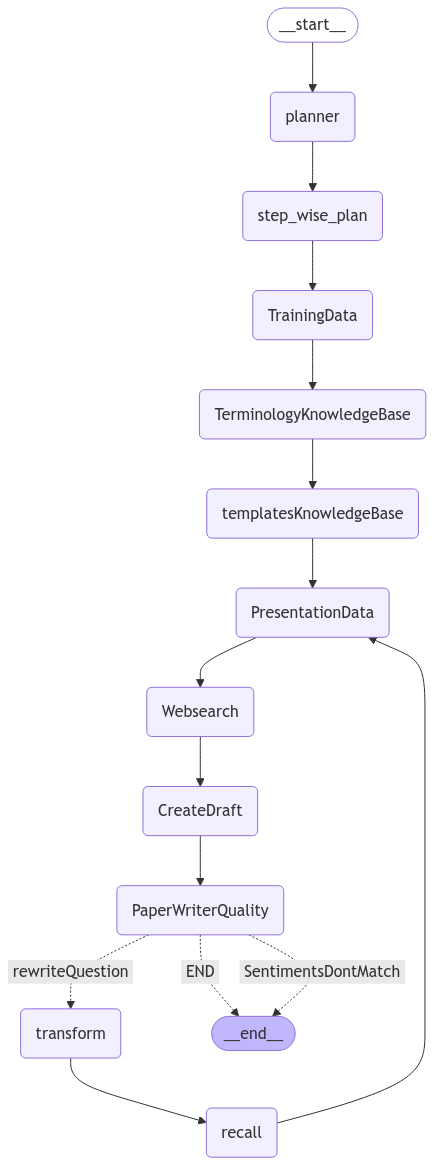

In [520]:
from IPython.display import Image, display

try:
    display(Image(plan_and_write_app.get_graph(xray=True).draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    print("Something happened")
    pass

In [531]:
questionprompts={
    "Title": "Give me title of the test data or presentation data in 10 words",
}
'''
questionprompts={
    "Title": "Give me title of the test data or presentation data in 10 words",
    "Abstract": "Give an 1000 word abstract of the paper based on the presentation slides. It can include background, results and conclusion.",
    "Body": "Give me the details of all the analysis and content of the paper based on the presentation test data slides",
    "Results": "Give me the results of the paper based on the presentation test data slides",
    "Conclusion": "Give me a concise conclusion of the paper",
    "References": "Give me all possible references listed in the presentation test data slides",
}'''

'\nquestionprompts={\n    "Title": "Give me title of the test data or presentation data in 10 words",\n    "Abstract": "Give an 1000 word abstract of the paper based on the presentation slides. It can include background, results and conclusion.",\n    "Body": "Give me the details of all the analysis and content of the paper based on the presentation test data slides",\n    "Results": "Give me the results of the paper based on the presentation test data slides",\n    "Conclusion": "Give me a concise conclusion of the paper",\n    "References": "Give me all possible references listed in the presentation test data slides",\n}'

In [534]:
thread = {"configurable": {"thread_id": ""}}

# Run
questionAnswers = {}
for qkey, qq in questionprompts.items():
  inputs = {"question": qq}
  print("Question: "+ qq)

  for output in plan_and_write_app.stream(inputs,thread):
        for key, value in output.items():
        # Node
            pprint(f"Node '{key}':")
            pprint("Value: "+str(value))
  pprint("\n---\n")
  print("Key:"+ str(key))
  questionAnswers[qq] = value["response"]
  # Final generation
  #pprint("FINAL Answer: "+str(value["generation"]))
  #pprint(value["generation"])

Question: Give me title of the test data or presentation data in 10 words
Planning step
'--------------------'
plan: ['Identify the source of the test data or presentation data.', 'Access the source to review the content of the data.', 'Locate the section or file that contains the title information.', 'Extract the title from the identified section or file.', 'Count the number of words in the extracted title to ensure it is 10 words.', 'If the title is not 10 words, adjust by summarizing or rephrasing to fit the requirement.', 'Finalize the 10-word title and verify its accuracy and relevance.']
"Node 'planner':"
("Value: {'question': 'Give me title of the test data or presentation data in "
 "10 words', 'plan': ['Identify the source of the test data or presentation "
 "data.', 'Access the source to review the content of the data.', 'Locate the "
 "section or file that contains the title information.', 'Extract the title "
 "from the identified section or file.', 'Count the number of wor

In [535]:
questionAnswers

{'Give me title of the test data or presentation data in 10 words': 'Image of a resolution test chart with parallel lines of varying thickness'}